In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10

In [2]:
from patsy import dmatrices

import statsmodels.api as sm
from scipy import stats

In [3]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [4]:
boston = load_boston()

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = pd.Series(boston.target) 

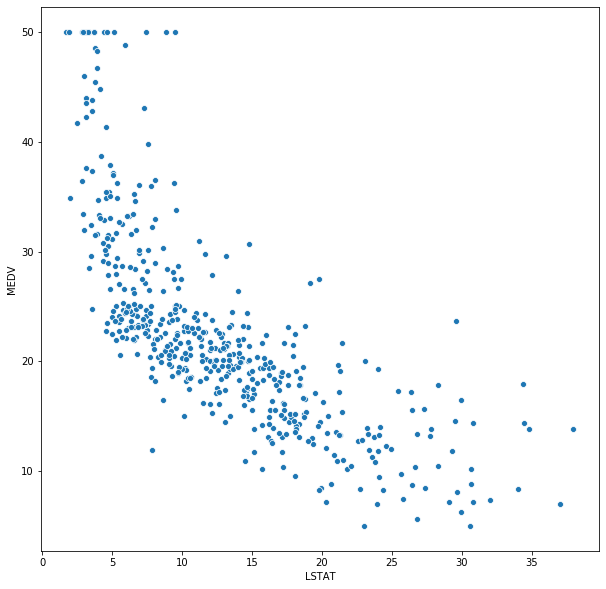

In [8]:
ax = sns.scatterplot(x='LSTAT', y='MEDV', data=df)

In [9]:
fit1 = LinearRegression().fit(X=df["LSTAT"].values.reshape(-1,1), 
                              y=df["MEDV"].values.reshape(-1, 1))

In [10]:
fit1.coef_

array([[-0.95004935]])

In [11]:
fit1.intercept_

array([34.55384088])

In [12]:
y, X = dmatrices('MEDV ~ LSTAT', data=df, return_type='dataframe')

In [13]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           5.08e-88
Time:                        10:19:58   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

**F-test**: overall significance of the model
A significant F test means that among the tested means, at least two of the means are significantly different.

**Omnibus**: explained variance in a set of data is significantly greater than the unexplained variance


**Durbin-Watson**: detect the presence of autocorrelation at lag 1 in the residuals

**Jarque-Bera**: goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.



In [14]:
res.resid.describe()

count    5.060000e+02
mean     3.521821e-14
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

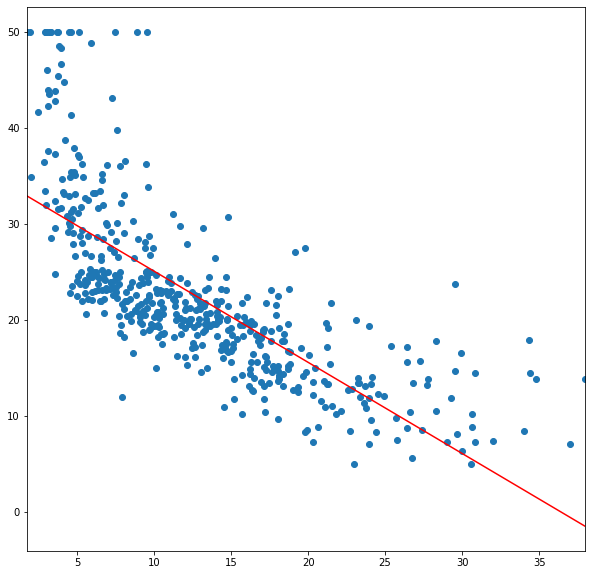

In [15]:
fig = sm.graphics.abline_plot(model_results=res, color='r')
ax = fig.axes[0]
# ax = sns.scatterplot(x='LSTAT', y='MEDV', data=df)
ax.scatter(X["LSTAT"], y)
ax.margins(.1)
plt.show()

2.5% and 97.5%

In [16]:
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874


In [17]:
X_pred = pd.DataFrame({"LSTAT": [5,10,15]})
X_pred = sm.add_constant(X_pred)

In [18]:
res.predict(X_pred)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [19]:
predictions = res.get_prediction(X_pred)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


## Multiple linear regression

In [20]:
y, X = dmatrices('MEDV ~ LSTAT + AGE', data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model
res2 = mod.fit()       # Fit model
print(res2.summary())   # Summarize model


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           2.98e-88
Time:                        10:19:59   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [21]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [22]:
y, X = dmatrices('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD+ TAX + PTRATIO+B+LSTAT', 
                 data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model
res3 = mod.fit()       # Fit model
print(res3.summary())   # Summarize model


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          6.72e-135
Time:                        10:19:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [23]:
# Hat matrix
H = np.array(X @ np.linalg.inv(X.T @ X)) @ X.T
    
# Leverage
h_ii = H.values.diagonal()

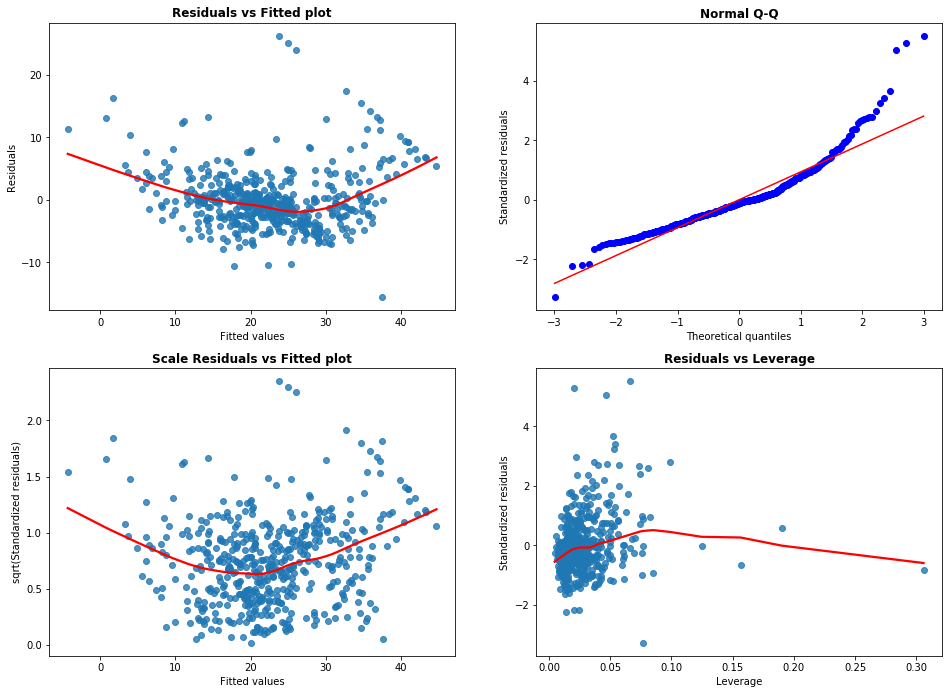

In [38]:
plt.figure(1, figsize=(16, 18))

# residual plot
plt.subplot(321)
ax = sns.regplot(x=res3.fittedvalues, y=res3.resid, lowess=True,
                  line_kws={'color':'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted plot', fontweight='bold')

# Normal Q-Q plot
plt.subplot(322)
ax = stats.probplot(res3.resid_pearson, dist='norm', plot=plt)
plt.ylabel('Standardized residuals')
plt.title('Normal Q-Q', fontweight='bold')

# Standardised residuals
plt.subplot(323)
ax = sns.regplot(x=res3.fittedvalues, y=np.sqrt(np.abs(res3.resid_pearson)), lowess=True,
                  line_kws={'color':'red'})
plt.xlabel('Fitted values')
plt.ylabel('sqrt(Standardized residuals)')
plt.title('Scale Residuals vs Fitted plot', fontweight='bold')

# Residuals vs Leverage plot
plt.subplot(324)
ax = sns.regplot(x=h_ii, y=res3.resid_pearson, lowess=True,
                  line_kws={'color':'red'})
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage', fontweight='bold');

The residual plots exhibits in this case a U-shape. This suggests, that our linear model doesn't optimal fit to our data. There are non-linear relationships inside the data. Also Also this shows some heteroscedasticity in our model.

residual vs leverage plot suggests that there are several potential outliers (points in top-right of axis) that could be having a strong effect (leverage) on our model.

** Heteroscedasticity – Non-constant variance of error terms

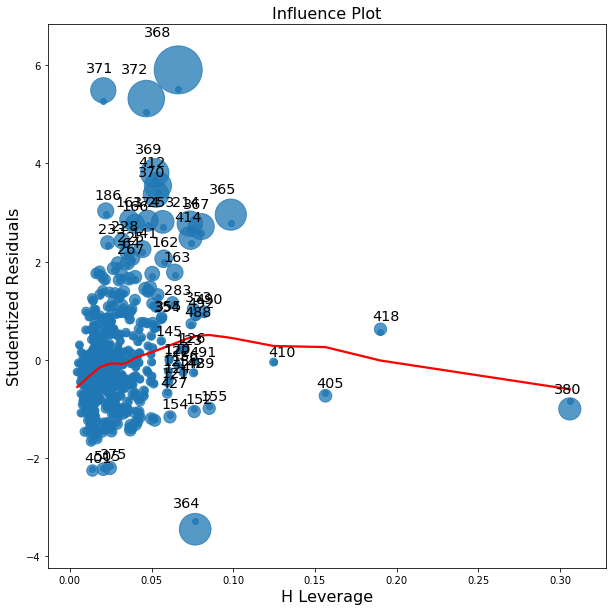

In [26]:
fig = sm.graphics.influence_plot(res3, ax=ax, criterion="cooks", color='blue')
fig

In [27]:
y, X = dmatrices('MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD+ TAX + PTRATIO+B+LSTAT', 
                 data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model
res4 = mod.fit()       # Fit model
print(res4.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          5.54e-137
Time:                        10:20:03   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

### Nonlinear terms and Interactions


In [28]:
y, X = dmatrices('MEDV ~ LSTAT*AGE', 
                 data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model
res5 = mod.fit()       # Fit model
print(res5.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           4.86e-88
Time:                        10:20:03   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [29]:
y, X = dmatrices('MEDV ~ LSTAT + I(LSTAT**2)', 
                 data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model
res6 = mod.fit()       # Fit model
print(res6.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          1.56e-112
Time:                        10:20:03   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

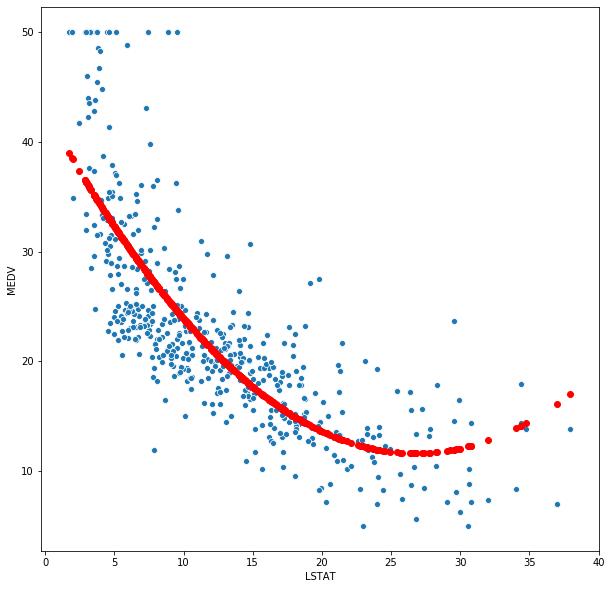

In [30]:
ax = sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.scatter(x=df['LSTAT'], y=res6.fittedvalues, color='r')

In [31]:
# y, X = dmatrices('MEDV ~ LSTAT + np.power(LSTAT,2) + np.power(LSTAT,3)+ np.power(LSTAT,4)', 
#                  data=df, return_type='dataframe')
# mod = sm.OLS(y, X)    # Describe model
# res7 = mod.fit()       # Fit model
# print(res7.summary())   # Summarize model

In [32]:
polynomial_features= PolynomialFeatures(degree=4)
X_lstat = polynomial_features.fit_transform(df['LSTAT'].values.reshape(-1, 1))
X_lstat.shape

(506, 5)

In [33]:
mod = sm.OLS(y, X_lstat)    # Describe model
res7 = mod.fit()       # Fit model
print(res7.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     257.8
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          4.16e-120
Time:                        10:20:03   Log-Likelihood:                -1557.4
No. Observations:                 506   AIC:                             3125.
Df Residuals:                     501   BIC:                             3146.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.3100      2.280     25.134      0.0

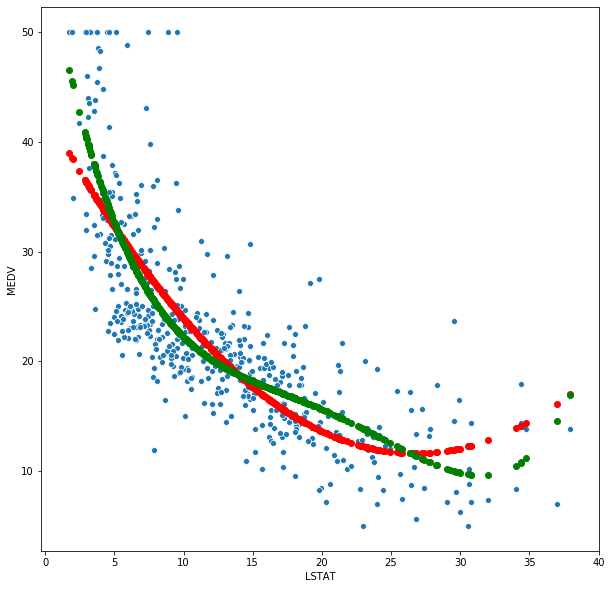

In [34]:
ax = sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.scatter(x=df['LSTAT'], y=res6.fittedvalues, color='r')
plt.scatter(x=df['LSTAT'], y=res7.fittedvalues, color='g')

### Qualitative predictors

In [50]:
carseats = pd.read_csv('./data/Carseats.csv', index_col=0)

In [59]:
carseats.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [52]:
all_features = carseats.columns[1:]

In [60]:
y, X = dmatrices(f"Sales ~ {'+'.join(all_features)} +Income:Advertising+Age:Price", data=carseats, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model
res8 = mod.fit()       # Fit model
print(res8.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          6.14e-166
Time:                        10:45:48   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    

In [63]:
print(res8.summary2())   # Summarize model

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.872    
Dependent Variable:   Sales            AIC:                1157.3378
Date:                 2020-03-25 10:47 BIC:                1213.2183
No. Observations:     400              Log-Likelihood:     -564.67  
Df Model:             13               F-statistic:        210.0    
Df Residuals:         386              Prob (F-statistic): 6.14e-166
R-squared:            0.876            Scale:              1.0213   
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            6.5756   1.0087   6.5185 0.0000  4.5922  8.5589
ShelveLoc[T.Good]    4.8487   0.1528  31.7243 0.0000  4.5482  5.1492
ShelveLoc[T.Medium]  1.9533   0.1258  15.5307 0.0000  1.7060  2.2005
Urban[T.Yes]         0.1402   0.1124   1.2470 0.2132 

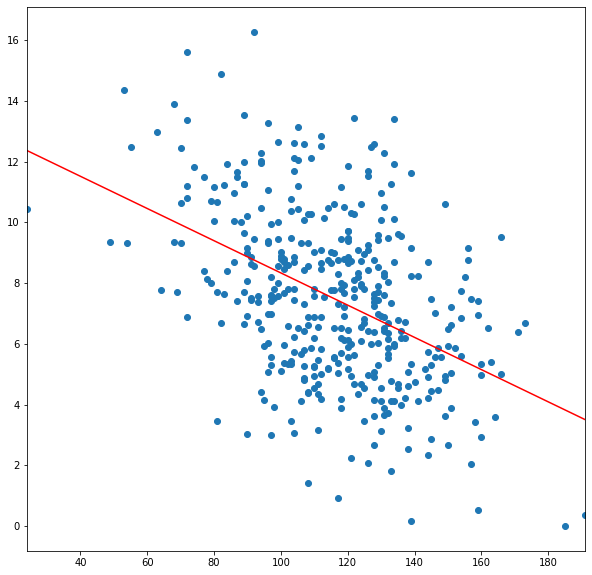

In [65]:
y, X = dmatrices('Sales ~ Price', 
                 data=carseats, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model
res9 = mod.fit()       # Fit model

fig = sm.graphics.abline_plot(model_results=res9, color='r')
ax = fig.axes[0]
# ax = sns.scatterplot(x='LSTAT', y='MEDV', data=df)
ax.scatter(X["Price"], y)
ax.margins(.1)
plt.show()